#### The dataset has downloaded from Kaggle : https://www.kaggle.com/primaryobjects/voicegender

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [3]:
data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
data.shape

(3168, 21)

In [5]:
# data.info()

In [6]:
print("Number of male: {}".format(data[data.label == 'male'].shape[0]))
print("Number of female: {}".format(data[data.label == 'female'].shape[0]))

Number of male: 1584
Number of female: 1584


In [7]:
data.loc[:,'label'][data['label']=="male"] = 1          # it converts  'male' : 1
data.loc[:,'label'][data['label']=="female"] = 0        # and 'female' : 0   of label column

In [8]:
X = data.iloc[:, :-1].values   # all independent 20 var.
y = data.iloc[:, -1].values    # dependent var. 'label'

y = y.astype('int64')    # label is of 'object' type , so converting into  'int'  data type

#### Now split the datset for training and testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42)

### scale down all independent features

In [10]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Random forest Classifier - model

In [11]:
forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print(f"Accuracy on training set: {forest.score(X_train, y_train) : 0.2%}")
print(f"Accuracy on test set: {forest.score(X_test, y_test) : 0.2%}")

print('\nclassification Report : \n', classification_report(y_test, y_pred))

Accuracy on training set:  99.58%
Accuracy on test set:  97.98%

classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       367
           1       0.99      0.98      0.98       425

   micro avg       0.98      0.98      0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



#### Decision Tree

In [12]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print(f"Accuracy on training set: {tree.score(X_train, y_train) : 0.2%}")
print(f"Accuracy on test set: {tree.score(X_test, y_test) : 0.2%}")


y_pred = tree.predict(X_test)
print('\nclassification Report : \n', classification_report(y_test, y_pred))

Accuracy on training set:  100.00%
Accuracy on test set:  96.21%

classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       367
           1       0.99      0.94      0.96       425

   micro avg       0.96      0.96      0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



#### Gradient Boosting model

In [13]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train) : 0.2%}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test) : 0.2%}")

y_pred = gbrt.predict(X_test)
print('\nclassification Report : \n', classification_report(y_test, y_pred))

Accuracy on training set:  99.71%
Accuracy on test set:  97.73%

classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       367
           1       0.99      0.97      0.98       425

   micro avg       0.98      0.98      0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



#### SVM

In [14]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

print(f"Accuracy on training set: {svm.score(X_train, y_train) : 0.2%}")
print(f"Accuracy on test set: {svm.score(X_test, y_test) : 0.2%}")

y_pred = svm.predict(X_test)
print('\nclassification Report : \n', classification_report(y_test, y_pred))

Accuracy on training set:  98.65%
Accuracy on test set:  97.85%

classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       367
           1       0.99      0.97      0.98       425

   micro avg       0.98      0.98      0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



#### Neural Network  model (Multi layer perceptron)

In [15]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print(f"Accuracy on training set: {mlp.score(X_train, y_train) : 0.2%}")
print(f"Accuracy on test set: {mlp.score(X_test, y_test) : 0.2%}")

y_pred = mlp.predict(X_test)
print('\nclassification Report : \n', classification_report(y_test, y_pred))

Accuracy on training set:  99.33%
Accuracy on test set:  97.85%

classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       367
           1       0.99      0.97      0.98       425

   micro avg       0.98      0.98      0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



## Plot the variable importance


In [16]:
def plot_feature_importances_data(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(data))
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")

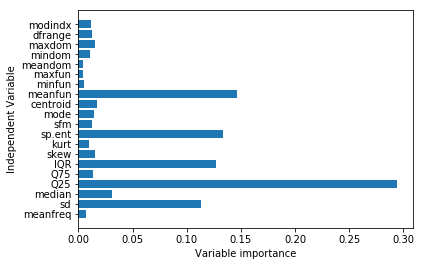

In [17]:
plot_feature_importances_data(forest)       # forest - model name of Random forest classifier

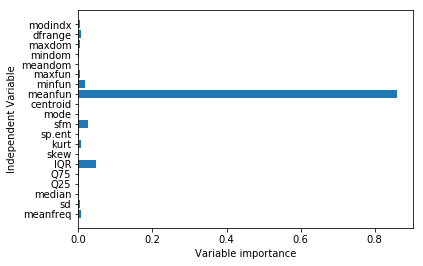

In [18]:
plot_feature_importances_data(tree)         # tree - Decision Tree

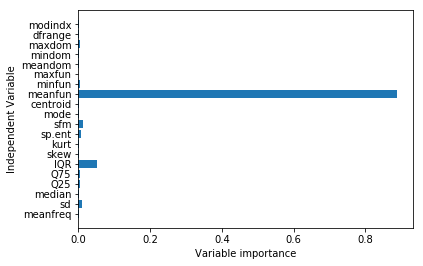

In [19]:
plot_feature_importances_data(gbrt)        # gbrt - Gradient Boosting Classifier

##### 'SVM' and 'MLP Classifier' has no attribute 'feature_importances_'  i.e. not plotted the graph